# Digital Signal Processing

**Homework Assignment No.3**,

Winter Semester 2023/24 (Course #24505)

- Submitted by: Syed Abdul Haseeb Qadri

# FFTs for Sample-Rate Conversion
*Based on:*
[1] Välimäki, V., & Bilbao, S. (2023). Giant FFTs for Sample-Rate Conversion. Journal of the Audio Engineering Society, 71(3), 88-99.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft

## Introduction

Sample-rate conversion (SRC) is used in audio signal processing.
The audio industry commonly uses many different sample rates, and it is necessary to be able to switch
between them without sacrificing sound quality.
In this task, we have to implement a SRC method, which uses
the fast Fourier transform (FFT) as fast implementation of the discrete-fourier transform (DFT) and the inverse FFT (IFFT) as fast implementation of the inverse-discrete-fourier transform (IDFT) algorithms to scale the spectrum of the audio signal. The FFT/IFFT allows an efficient and algorithmically simple conversion
between any two sample rates. If we would not use these very efficient transformations, the SRC would be not implemented that fast.

The most commonly used sample rate is 44.1 kHz, chosen as the standard for the CD system in the late 1970s.
The recently popular music streaming services, such as Spotify, Amazon Music, Apple Music, Deezer, and more are using this sample rate in novadays.
In professional audio and video, however, 48 kHz is the recommended choice.

Since the 1990s, oversampled rates such as 96 kHz and 192 kHz have become popular in music production.
Furthermore, the family of multiples of 44.1 kHz, namely 88.2 and 176.4 kHz, are
available in some systems, because they are included in
the MPEG-2 audio standard. The highest sample rates used
currently for multi-bit audio signals are 352.8 and 384 kHz.

Finally, we can say, that the plurality of sample rates and the SRC is required and an important research problem, especially in audio signal processing.

## Role of the Discrete Fourier Transform

From the lecture it is known that the DFT ideally computes the spectrum of a signal.
This has led to the popular _zero-padding_ technique used in connection with the DFT (FFT): simply adding zeros at the end of a time-domain signal does not modify the spectrum of
the signal but allows for interpolation in the spectral domain. This is a useful and common tool in spectral
analysis.

The corresponding property of the DFT that it interpolates any bandlimited signal perfectly in the time domain.

When the spectrum of a signal is appended with zeros,
the inverse DFT (IDFT) effectively applies the aliased sinc
function for time-domain interpolation.

___

## Task 1. (3P): DFT and Zero-Padding

Generate a signal
$$x[k] =  \text{cos}(2\, \Omega_N\, k) - \frac{1}{2} \text{sin}(7\, \Omega_N k) $$  in the time range $0\leq k \leq N-1$ using the fundamental digital frequency $\Omega_N = \frac{2 \pi}{N}$. The whole signal length is $N=64$. Plot the signal over $k$ with proper axis labeling.

- Is the signal $x[k]$ periodic?
- Compute the DFT $X[\mu]$ via an `fft()` and plot the spectrum in a nice format.
- State the observed properties of the spectrum.
- What effect occurs if we calculate the DFT of the signal without, for example, the last four entries (`fft(x_k[:-4])`)? Plot this DFT also in a nice format and describe the plot. In which case does this effect __not__ occur (You are welcome to write down this in an equation way)?

After this brief introduction let's continue with the zero-padding part. The name of this procedure is exactly the same as what has to be done - add zeros to the signal in the time domain. So our next task is to:

- Add $N/2$, $N$, and $2N$ zeros to the signal $x[k]$. Plot the spectra in a nice format.
- Describe the effect of zero-padding.

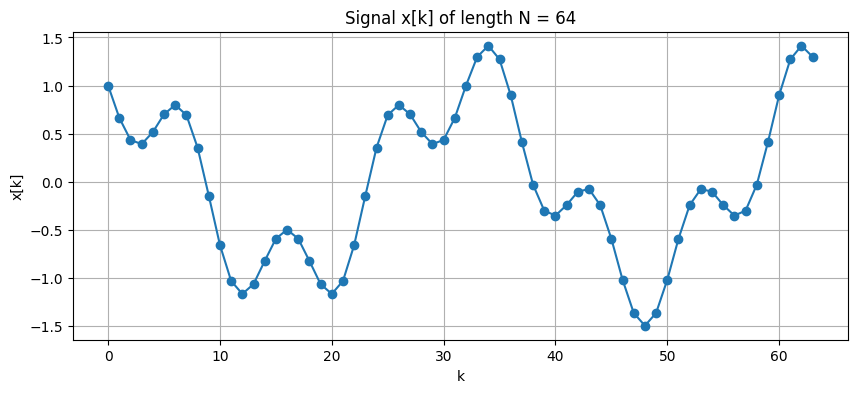

In [ ]:
N = 64  #Length of signal
k = np.arange(0, N)
Omega_N = 2 * np.pi/N
x = np.cos(2 * Omega_N * k) - (1/2) * np.sin(7 * Omega_N * k)

#Plot the figure
plt.figure(figsize=(10, 4))
plt.plot(x, 'o-')
plt.title('Signal x[k] of length N = 64')
plt.xlabel('k')
plt.ylabel('x[k]')
plt.grid(True)


The given signal is periodic with N = 64 samples per cycle.

**DFT of the Signal**

<ipython-input-4-5c2ceeafb51e>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.abs(X), basefmt=" ", use_line_collection=True)
<ipython-input-4-5c2ceeafb51e>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.angle(X), basefmt=" ", use_line_collection=True)


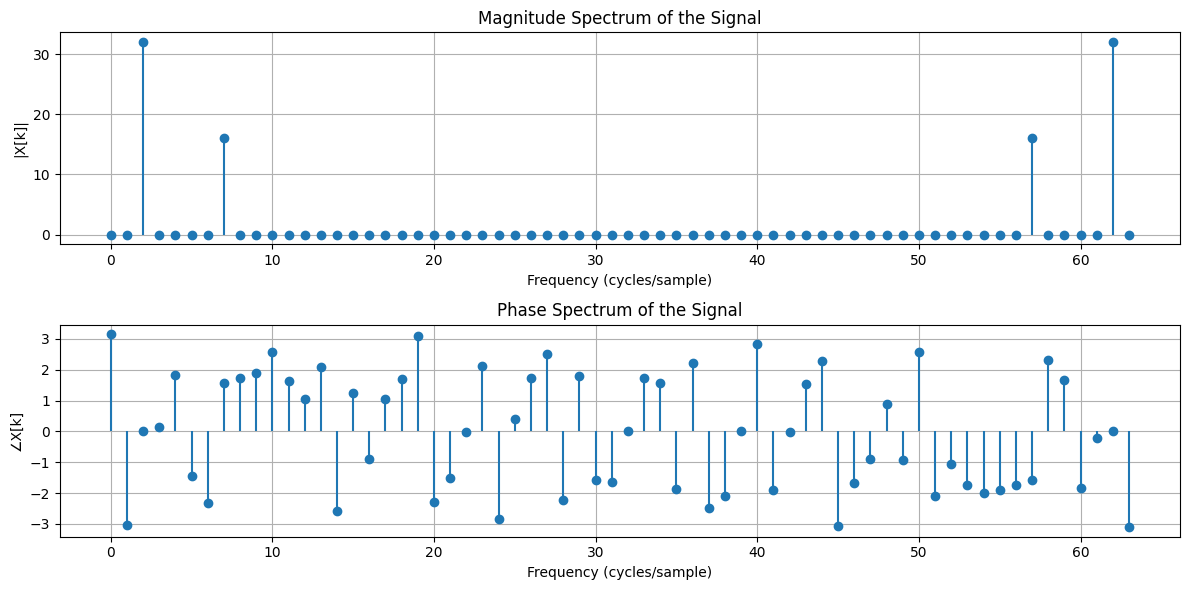

<function print>

In [ ]:
X = np.fft.fft(x)

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(np.abs(X), basefmt=" ", use_line_collection=True)
plt.title('Magnitude Spectrum of the Signal')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('|X[k]|')
plt.grid(True)

# Plot the phase spectrum
plt.subplot(2, 1, 2)
plt.stem(np.angle(X), basefmt=" ", use_line_collection=True)
plt.title('Phase Spectrum of the Signal')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('∠X[k]')
plt.grid(True)

plt.tight_layout()
plt.show()
print

**Properties of The Above Spectrum**

1.   The peaks at 2nd and 7th frequency bin indicate the presence of frequency components in the given signal as 2ΩN and 7ΩN.
2.   The spectrum is symmetric, the first half represents the positive increasing frequencies while the 2nd half denotes the decreasing negative frequencies.

**DFT of Signal Without last 4 Entries**

We will now calculate the DFT of the signal without the last four entries (`fft(x_k[:-4])`)

<ipython-input-5-d2ff51388242>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.abs(X4), basefmt=" ", use_line_collection=True)
<ipython-input-5-d2ff51388242>:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.angle(X4), basefmt=" ", use_line_collection=True)


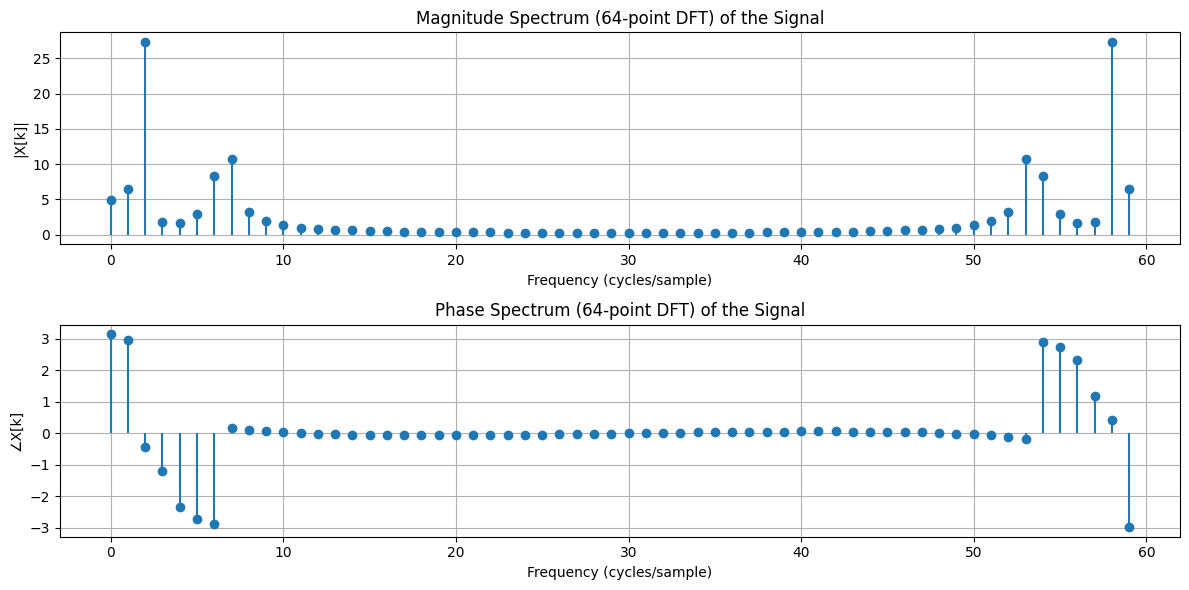

<function print>

In [ ]:
X4 = np.fft.fft(x[:-4])

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.stem(np.abs(X4), basefmt=" ", use_line_collection=True)
plt.title('Magnitude Spectrum (64-point DFT) of the Signal')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('|X[k]|')
plt.grid(True)

# Plot the phase spectrum
plt.subplot(2, 1, 2)
plt.stem(np.angle(X4), basefmt=" ", use_line_collection=True)
plt.title('Phase Spectrum (64-point DFT) of the Signal')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('∠X[k]')
plt.grid(True)

plt.tight_layout()
plt.show()
print



*   DFT of the given signal without last four entries results in leakage in the frequency domain as can be seen the above spectrum. (the peaks are spreaded and spectrum is distorted)
*   This effect doesn't occur when the signal is periodic i.e $x[k] = x[k + N]$ for all k.

**Zero Padding**

<ipython-input-6-daa3991ace39>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.abs(X_1), basefmt=" ", use_line_collection=True)
<ipython-input-6-daa3991ace39>:26: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.abs(X_2), basefmt=" ", use_line_collection=True)
<ipython-input-6-daa3991ace39>:34: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  pl

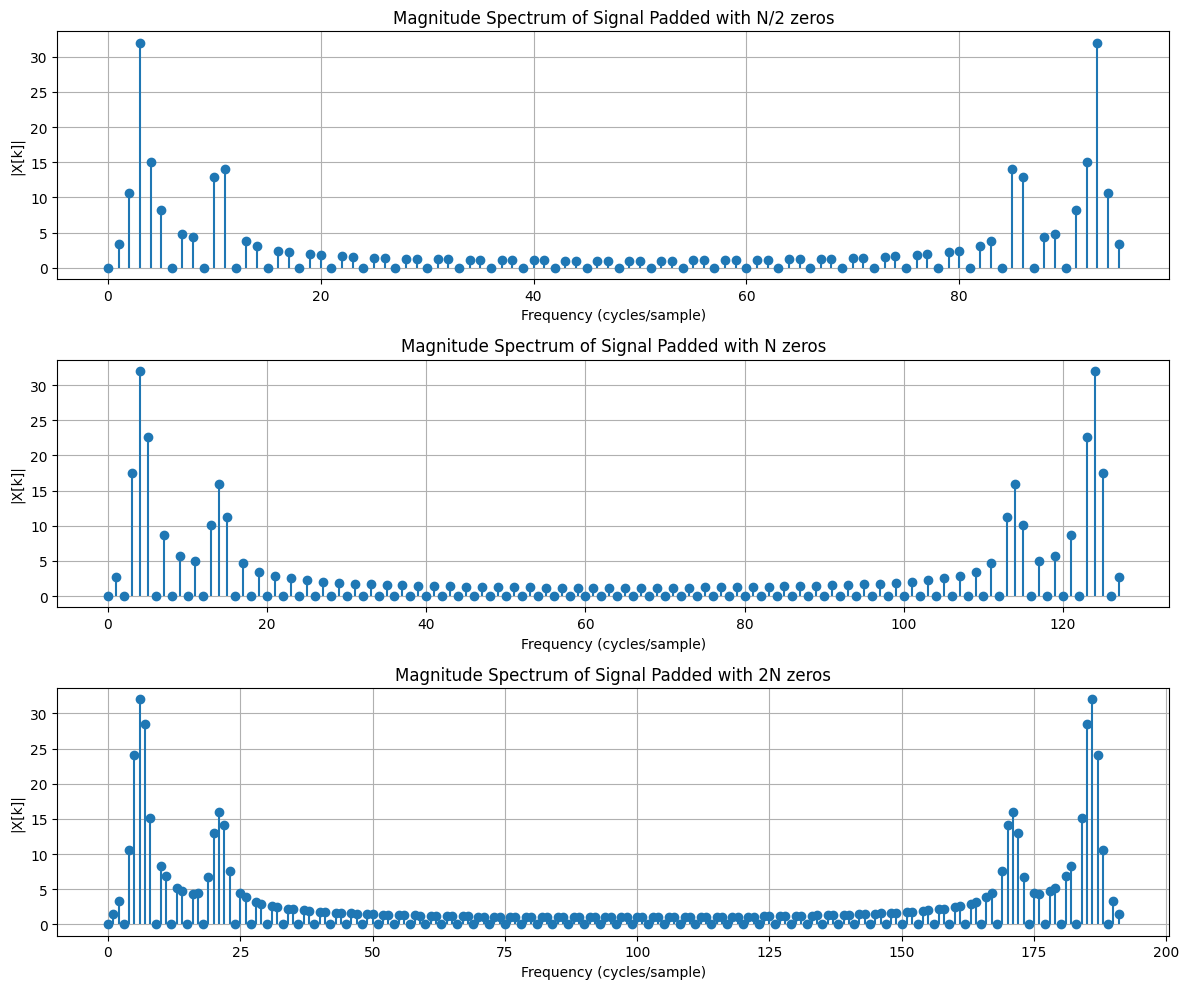

<function print>

In [ ]:
N = 64
k = np.arange(0, N)
Omega_N = 2 * np.pi/N
x = np.cos(2 * Omega_N * k) - (1/2) * np.sin(7 * Omega_N * k)

# Pad zeros using numpy
padded_x_1 = np.pad(x, (0, int(N/2)), 'constant')
padded_x_2 = np.pad(x, (0, N), 'constant')
padded_x_3 = np.pad(x, (0, 2*N), 'constant')

X_1 = np.fft.fft(padded_x_1)
X_2 = np.fft.fft(padded_x_2)
X_3 = np.fft.fft(padded_x_3)

# Plot the magnitude spectrum
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.stem(np.abs(X_1), basefmt=" ", use_line_collection=True)
plt.title('Magnitude Spectrum of Signal Padded with N/2 zeros')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('|X[k]|')
plt.grid(True)

# Plot the magnitude spectrum
plt.subplot(3, 1, 2)
plt.stem(np.abs(X_2), basefmt=" ", use_line_collection=True)
plt.title('Magnitude Spectrum of Signal Padded with N zeros')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('|X[k]|')
plt.grid(True)

# Plot the magnitude spectrum
plt.subplot(3, 1, 3)
plt.stem(np.abs(X_3), basefmt=" ", use_line_collection=True)
plt.title('Magnitude Spectrum of Signal Padded with 2N zeros')
plt.xlabel('Frequency (cycles/sample)')
plt.ylabel('|X[k]|')
plt.grid(True)

plt.tight_layout()
plt.show()
print

**Effect of Zero Padding**

*   The number of points increases in the frequency domain. More points in the frequency domain can be effectively interpolated, resulting in a more detailed representation of the signal's frequency content.
*   The peaks gets closer to each other as the number of zeros padded are increased.
*   Zero-padding doesn't not add new frequency components in the spectrum. Due to zero-padding the existing frequency components are more visible.



## Task 2. (6 Points): Low-Pass Filtering


Let's go back to our signal $x[k]$ without zero-padding and the corresponding spectrum $X[\mu]$.
To low-pass filter a signal, there are multiple possibilities.

One approach is to manipulate the spectrum of the signal.

- Plot the spectrum and cut off all frequencies above the 4th bin. Pay special attention, the spectrum symmetry.
- Compute the IFFT and compare it to the theoretically exact valued signal. Which signal part is left if we remember our signal equation
$$x[k] =  \text{cos}(2\, \Omega_N\, k) - \frac{1}{2} \text{sin}(7 \, \Omega_N\, k) $$
from Task 1?

- Implement a Butterworth filter of order 4 using the provided fuctions `butter`, `lfilter` from the `scipy` library (running: `butter?` or `lfilter?` inside a cell leads to the docstring information of the function).
- Get the second-order system (sos) representation of the implemented Butterworth filter (hint: `sos=butter(..., output="sos")`), and use `sosfreqz` to calculate and plot the frequency response.
- Plot the magnitude response to visualize how the filter attenuates or passes different frequencies.
- Describe the properties of the implemented Butterworth filter

In [ ]:
from scipy.signal import butter, lfilter, sosfreqz

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


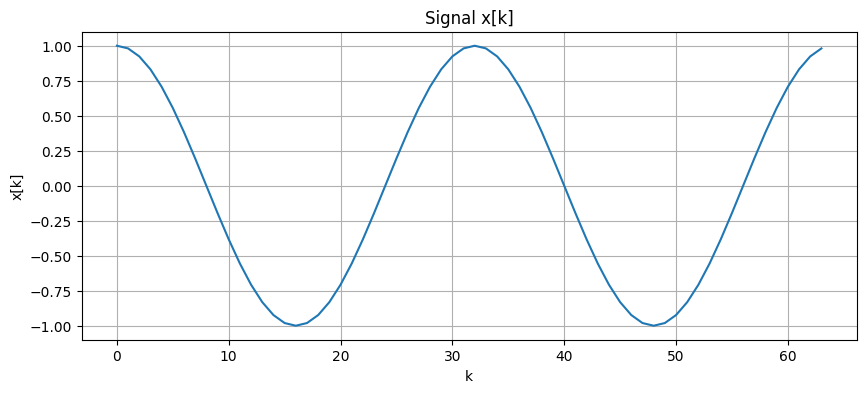

In [ ]:
Cutoff_freq_bin = 4
N = len(X)

#Keeping spectrum symmetry in view, frequencies upto 4th bin are taken rest of the bins are cutoff (set zero)
X_cut = np.concatenate([X[:Cutoff_freq_bin], X[0:N-2*Cutoff_freq_bin] == 0 ,X[-Cutoff_freq_bin:]])

x_cut = np.fft.ifft(X_cut)

#Plot the figure
plt.figure(figsize=(10, 4))
plt.plot(x_cut)
plt.title('Signal x[k]')
plt.xlabel('k')
plt.ylabel('x[k]')
plt.grid(True)


In above low pass filter, where frequencies above 4th bin are cut off. It is observed that, only consine component of the original signal is retained after applying IFFT on the filtered spectrum. Since Sine component in the equation corresponds to 7th bin, therefore it is not present.

**Butterworth Filter**

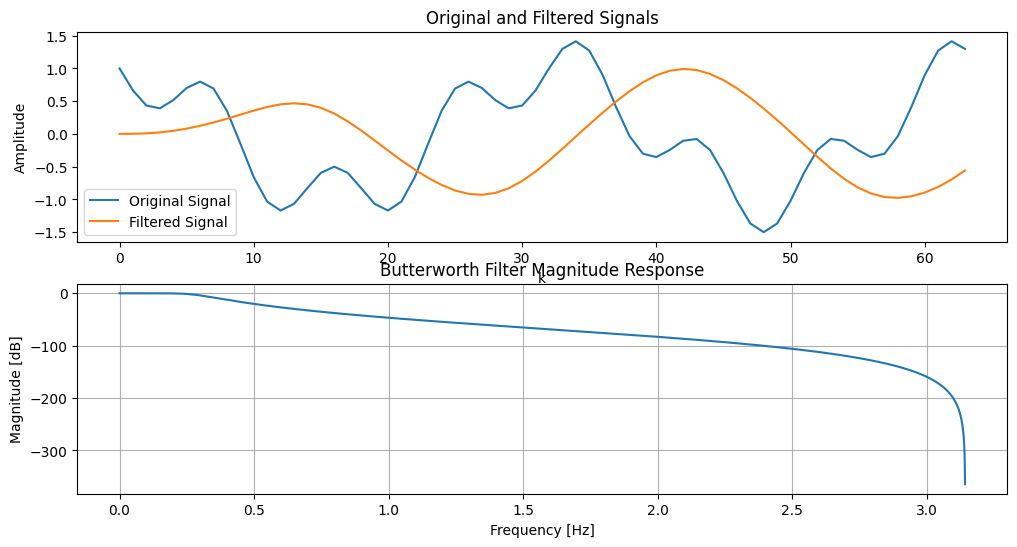

In [ ]:
# Design a Butterworth filter
order = 4
cutoff_frequency = 0.09

# Get the filter coefficients
b, a = butter(order, cutoff_frequency, btype='low', analog=False, output='ba')
# Apply the filter to the signal
filtered_signal = lfilter(b, a, x)

# Get the second-order system (SOS) representation
sos = butter(order, cutoff_frequency, btype='low', analog=False, output='sos')

# Calculate the frequency response using sosfreqz
frequencies, magnitude_response = sosfreqz(sos, worN=8000)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(k, x, label='Original Signal')
plt.plot(k, filtered_signal, label='Filtered Signal')
plt.title('Original and Filtered Signals')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.legend()

# Plot the magnitude response of the filter
plt.subplot(2, 1, 2)
plt.plot(frequencies, 20 * np.log10(np.abs(magnitude_response)))
plt.title('Butterworth Filter Magnitude Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.show()

The magnitude response plot illustrates how the Butterworth filter attenuates different frequencies.
In a low-pass filter, lower frequencies are allowed to pass through, while higher frequencies are attenuated.
The cutoff frequency is the frequency at which the filter starts to attenuate the signal.

## Task 3. (8 Points): Sample-Rate Conversion

### Up-Sampling
Let's start with upsampling using the FFT. For real signals, all spectral information is included in bins $0$ to $N/2$, where bin $0$ corresponds to $0$ Hz and bin $N/2$ to the Nyquist limit.

- Define the sample rates $N_1$ (`N1 = 32`) and $N_2$ (`N2 = 64`).
- The upsampling factor is $s = \frac{N2}{N1}$.
- Create two discrete-time signals `x1` and `x2_exact` with the sample rates `N1` and `N2` and plot them in a nice format (x-ticks scaling, same plot). The signal is defined as in Task 1:
$$x[k] =  \text{cos}(2\, \Omega_N\, k) - \frac{1}{2} \text{sin}(7 \, \Omega_N\, k).$$
- The variable $\Omega_N$ is defined as $\Omega_N = \frac{2 \pi}{N_1}$

Due to the fact that the upsampling factor is $s=2$ the plotted signal with $N_2$ has twice as many samples as the signal with the sample rate $N_1$, which means we should have an interpolation of $x[k]$.

Until now we just created the signal with a low sample rate $N_1$ and the exact upsampled reference signal with $N_2$ in the time domain. To implement upsampling using the FFT, follow these steps:

- Compute the FFT of the signal `x1`
- Create an empty vector of length $N_2=64$
- Apply the frequency-domain zero-padding as shown in the paper [1] in Fig. 1(b) and Eq. (2).
- Compute the IFFT of the newly created signal spectrum and save it to `x2`.
- Compare the signals `x2` and `x2_exact`. They should match very closely (use `np.allclose()`).

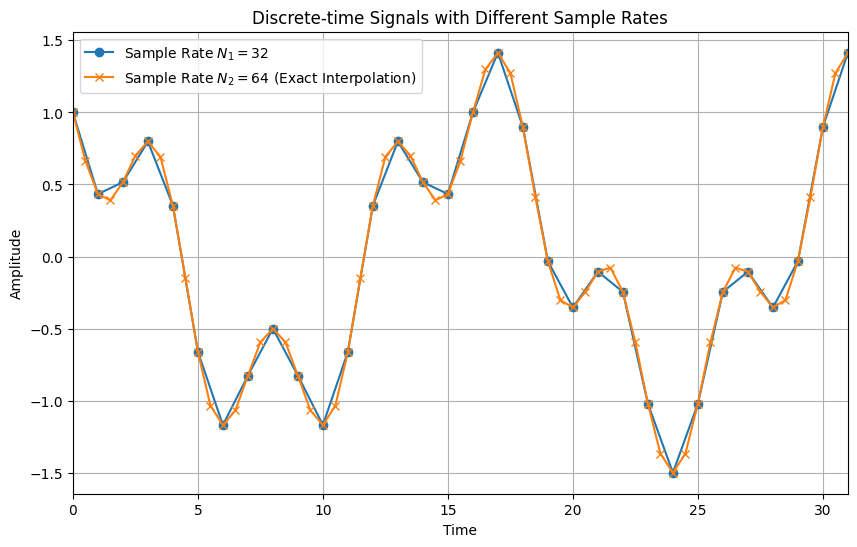

In [ ]:
# Define parameters
N1 = 32
N2 = 64
upsampling_factor = N2 / N1
Omega_N = 2 * np.pi / N1

# Define the signal function
def x_k(k):
    return np.cos(2 * Omega_N * k) - (1/2) * np.sin(7 * Omega_N * k)

# Generate time values for N1 and N2
time_N1 = np.arange(0, N1)
time_N2 = np.arange(0, N2, 1/upsampling_factor)

# Generate signals x1 and x2_exact
x1 = x_k(time_N1)
x2_exact = x_k(time_N2)

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(time_N1, x1, 'o-', label=f'Sample Rate $N_1 = {N1}$')
plt.plot(time_N2, x2_exact, 'x-', label=f'Sample Rate $N_2 = {N2}$ (Exact Interpolation)')
plt.xlim(0, N1-1)

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Discrete-time Signals with Different Sample Rates')
plt.legend()
plt.grid(True)
plt.show()

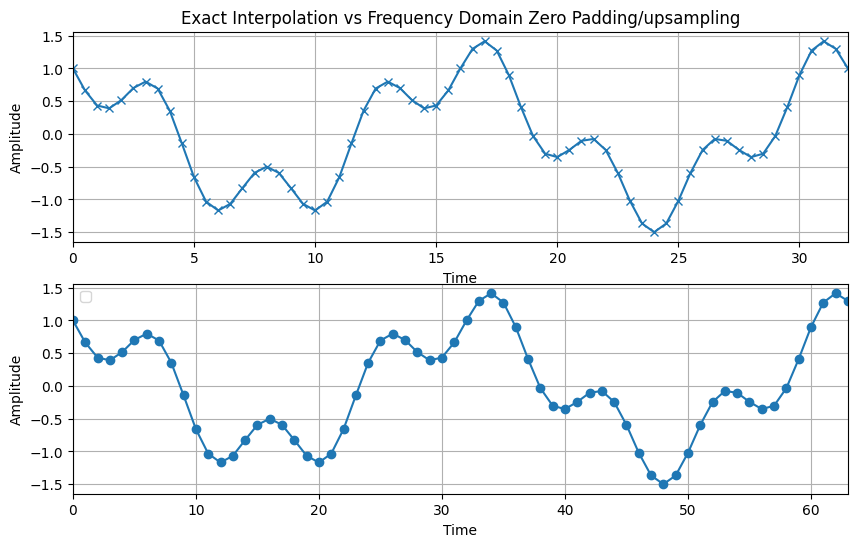

True


In [ ]:
X1 = np.fft.fft(x1)


# Calculating the index to split the sequence
split_index = len(X1) // 2

# Creating and empty vector of length 64
empty_vector = np.empty(64, dtype=complex)

# Frequency domain zero-padding as shown in paper [1]
empty_vector[:split_index-1] = X1[:split_index-1]
empty_vector[split_index-1] = (1/2)*X1[split_index-1]                 # Half of data at Nyquist bin is inserted at its original locations (bin number N/2)
empty_vector[split_index:len(empty_vector)-split_index-1] = 0
empty_vector[len(empty_vector)-split_index-1] = (1/2)*X1[split_index-1]    # Half at the bin location just before the image spectrum
empty_vector[len(empty_vector)-split_index:] = X1[split_index:]


X2 = upsampling_factor*np.fft.ifft(empty_vector)  #Signal is scaled by up sampling factor as mentioned in paper

# Plot the signals
plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.plot(time_N2, x2_exact, 'x-', label=f'Sample Rate $N_2 = {N2}$ (Exact Interpolation)')
plt.xlim(0, N1)
plt.title('Exact Interpolation vs Frequency Domain Zero Padding/upsampling')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(X2,'o-')
plt.xlim(0, N2-1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


result = np.allclose(X2, x2_exact[:N2])   # Since x2_exact was plotted for 128 values so we are comparing its first 64 samples with X2
print(result)

### Down-Sampling

Down-sampling refers to the lowering the sample rate, which requires ensuring that the spectrum of the signal does not exceed the new Nyquist limit.
In conventional SRC techniques, down-sampling is always paired with an appropriate low-pass filter.
In the giant-FFT method from [1], down-sampling is accomplished by truncating the FFT buffer of the input signal according to the ratio of the output and input sample rates:

The lower part of the spectrum up to the new Nyquist limit, together with its image spectrum, are retained, but values in the rest of the bins are discarded, as illustrated in Fig. 1(c) or formally expressed in Eq. (3).

- Implement the down-sampling from [1] for the variable `x2` for the lower sample rate $N_1=32$ and compare it with the signal of the beginning of this task.

True


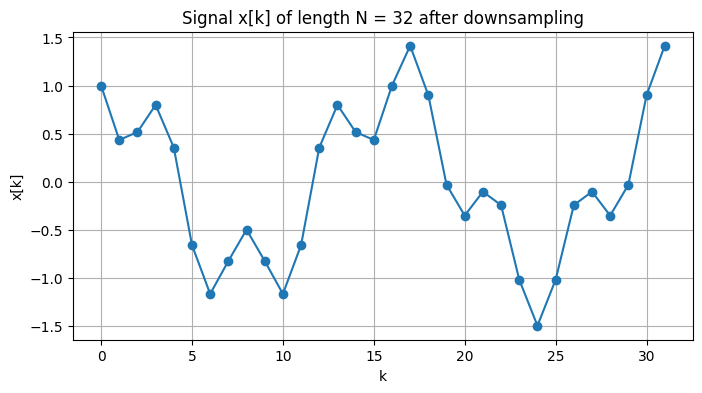

In [ ]:
empty_vector_1 = np.empty(32, dtype=complex)

# Calculating the index to split the sequence
split_index = len(empty_vector_1) // 2

empty_vector_1[:split_index-1] = empty_vector[:split_index-1]
empty_vector_1[split_index-1] = empty_vector[split_index-1]
empty_vector_1[split_index:] = empty_vector[len(empty_vector_1)+split_index:]

x_new = np.fft.ifft(empty_vector_1)

#Plot the figure
plt.figure(figsize=(8, 4))
plt.plot(x_new, 'o-', label=f'Sample Rate $N_1 = {N1}$')
plt.title('Signal x[k] of length N = 32 after downsampling')
plt.xlabel('k')
plt.ylabel('x[k]')
plt.grid(True)

result = np.allclose(x1, x_new)    #comparing signal with the signal at the beginning of the task
print(result)

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples*.